In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()
# from the below data we can understand that some column as nan value by analysisng the count

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# loan id is not necessary to preidct the loan status. Mostly dependents also not necessary to pridict, so we going to drop this two column
data.drop(columns=['Loan_ID','Dependents'],inplace=True)

data.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [11]:
data.shape

(614, 11)

In [12]:
data.dtypes

Gender                object
Married               object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
data.duplicated().sum()

0

/tmp/ipykernel_4556/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

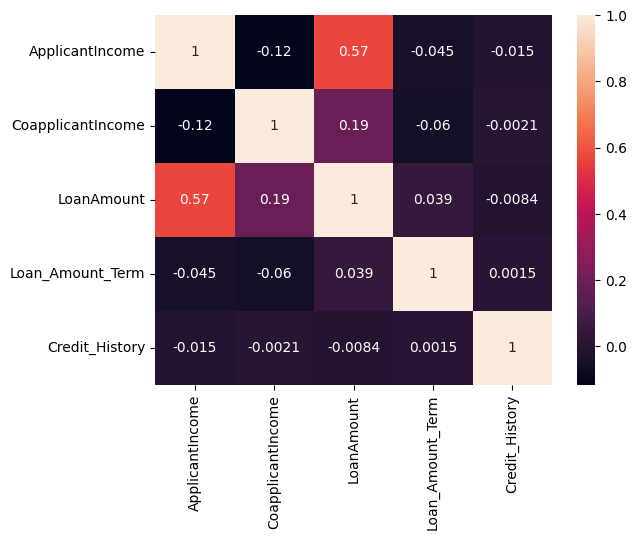

In [14]:
sns.heatmap(data.corr(),annot=True)

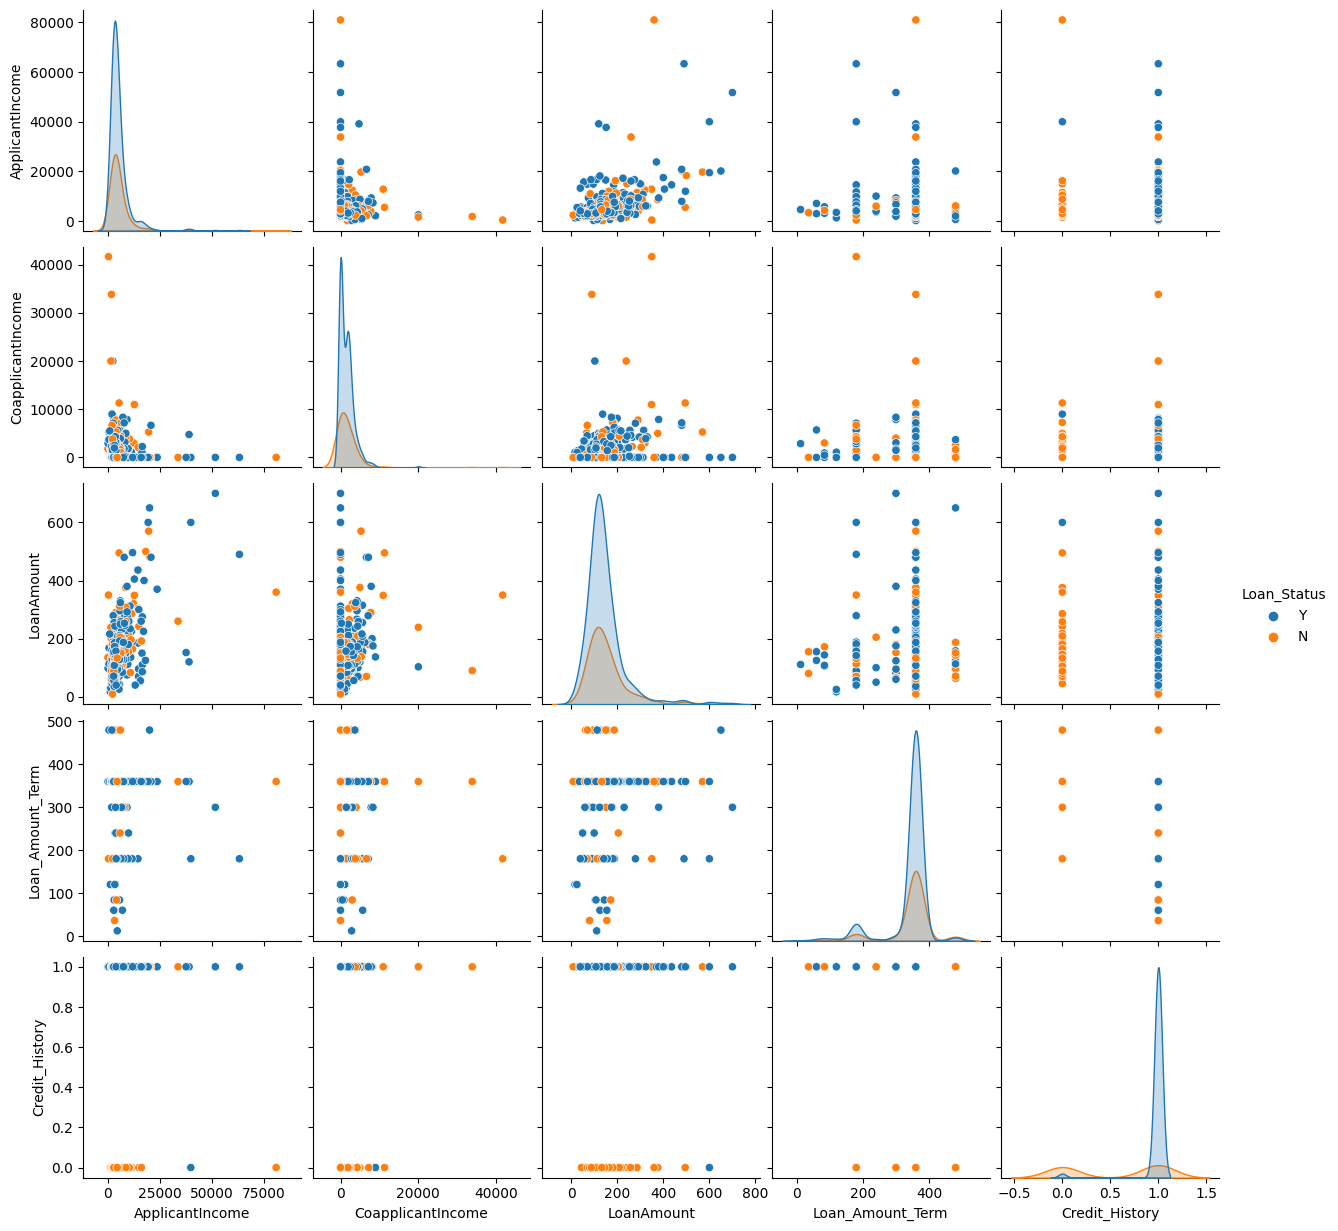

In [15]:
sns.pairplot(data,hue='Loan_Status')

In [16]:
data.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

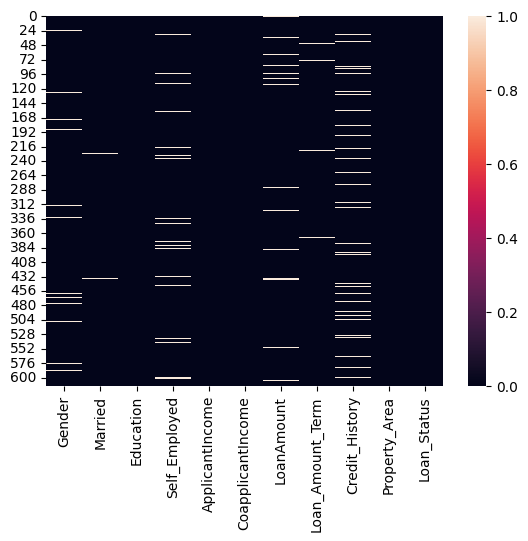

In [18]:
sns.heatmap(data.isnull())

## Data preprocessing

#### Handeling the missing value

In [19]:
data.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# chaning the null value in the credit history column with the mean value
data['Credit_History'].fillna(data.Credit_History.mean(),inplace=True)
data['Credit_History'].isnull().sum()

0

In [21]:
data['Loan_Amount_Term'].fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Loan_Amount_Term.isnull().sum()

0

In [22]:
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)
data.LoanAmount.isnull().sum()

0

In [23]:
# lets fill categorical with mode values
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.Married.isnull().sum()

0

In [24]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Gender.isnull().sum()

0

In [25]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data.Self_Employed.isna().sum()

0

In [26]:
data.isna().sum()
# we have successfully handelled the missing value

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# converting categorical to numerical value
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
# Encoding
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Married']=le.fit_transform(data.Married)
data['Gender']=le.fit_transform(data.Gender)
data['Self_Employed']=le.fit_transform(data.Self_Employed)
data['Education']=le.fit_transform(data.Education)
data['Property_Area']=le.fit_transform(data.Property_Area)
data.head(20)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.000000,2,Y
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.000000,0,N
2,1,1,0,1,3000,0.0,66.000000,360.0,1.000000,2,Y
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.000000,2,Y
4,1,0,0,0,6000,0.0,141.000000,360.0,1.000000,2,Y
5,1,1,0,1,5417,4196.0,267.000000,360.0,1.000000,2,Y
6,1,1,1,0,2333,1516.0,95.000000,360.0,1.000000,2,Y
7,1,1,0,0,3036,2504.0,158.000000,360.0,0.000000,1,N
8,1,1,0,0,4006,1526.0,168.000000,360.0,1.000000,2,Y
9,1,1,0,0,12841,10968.0,349.000000,360.0,1.000000,1,N


In [30]:
data.Property_Area.unique()

array([2, 0, 1])

## Seperating the independent and dependent variable

In [31]:
x=data.drop(columns='Loan_Status')
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2


In [32]:
y=data["Loan_Status"]
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

### Spliting the data into test and train

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train.shape

(491, 10)

## DT model Building

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model=DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
pred=model.predict(x_test)
pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y'], dtype=object)

In [40]:
from sklearn import metrics

In [41]:
metrics.confusion_matrix(y_test,pred)

array([[21, 22],
       [15, 65]])

In [42]:
acc=metrics.accuracy_score(y_test,pred)
acc

0.6991869918699187

In [43]:
# for decision tree the err
err=1-acc
err

0.30081300813008127

In [44]:
future=model.predict([[0,0,0,1,5829,0,146,360,1,2]])
future

/home/hari/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

In [45]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


## Hyper Parameter

#### It show 69.9186.. for accuracy we try to increase it by using the hyper parameter

In [47]:
# tuning the model
from sklearn.model_selection import GridSearchCV

In [60]:
parameter={'max_depth':[5,10,15,20,30,40,50],
          'random_state':[0,1,2,3,4,5]}

In [61]:
grid=GridSearchCV(model,parameter,cv=5)

In [62]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30, 40, 50],
                         'random_state': [0, 1, 2, 3, 4, 5]})

In [63]:
grid.best_params_

{'max_depth': 5, 'random_state': 0}

In [70]:
grid.best_score_
# You can the accuracy is higher compared to the 69.91%

0.7718820861678004

In [69]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)